In [2]:
library(edgeR)
library(ggplot2)
library(ggrepel)
library(EnsDb.Hsapiens.v75)
library(stringr)
library(ComplexHeatmap)
#library(clusterProfiler)
library(circlize)
library(ggrepel)
#library(patchwork)
library(org.Hs.eg.db)
library(viridis)
#library(umap)

In [22]:
count_data = read.table("../data/thp1_crispri_raw_counts.tsv", skip = 1, header = TRUE, row.names=1)
count_data = count_data[,6:dim(count_data)[2]]
head(count_data)

,results.star.BD245_1_sgNTC_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_1_sgNTC_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_1_sgNTC_rep3_Aligned.sortedByCoord.out.bam,results.star.BD245_13_sgGOT2.1_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_13_sgGOT2.1_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_13_sgGOT2.1_rep3_Aligned.sortedByCoord.out.bam,results.star.BD245_16_sgMCM2.1_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_16_sgMCM2.1_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_16_sgMCM2.1_rep3_Aligned.sortedByCoord.out.bam,results.star.BD245_16_sgMCM2.1_rep4_Aligned.sortedByCoord.out.bam,results.star.BD245_17_sgPOLD3.1_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_17_sgPOLD3.1_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_17_sgPOLD3.1_rep3_Aligned.sortedByCoord.out.bam,results.star.BD245_18_sgPOLD3.2_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_18_sgPOLD3.2_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_20_sgABCB7.1_rep1_Aligned.sortedByCoord.out.bam,results.star.BD245_20_sgABCB7.1_rep2_Aligned.sortedByCoord.out.bam,results.star.BD245_20_sgABCB7.1_rep3_Aligned.sortedByCoord.out.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,0,0,2,0,0,0,0,0,1.5,0,0,1,1,1,0,0,0.5,0
ENSG00000227232.5,0,5,1,1,0,0,2,0,1.5,0,1,1,0,0,0,0,2.5,2
ENSG00000278267.1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0
ENSG00000243485.5,2,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0.0,0
ENSG00000284332.1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0
ENSG00000237613.2,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0


In [23]:
# change colnames and rownames
colnames(count_data) = gsub("results.star.BD245_", "", gsub("_Aligned.sortedByCoord.out.bam", "", colnames(count_data)))

potential_rownames = as.character(sapply(rownames(count_data), function(x) strsplit(x, '[.]')[[1]][1]))
count_data = count_data[!(duplicated(potential_rownames)),]
rownames(count_data) = potential_rownames[!(duplicated(potential_rownames))]                           
annotations_orgDb <- AnnotationDbi::select(EnsDb.Hsapiens.v75, # database
                                     keys = rownames(count_data) ,  # data to use for retrieval
                                     columns = c("SYMBOL"), # information to retreive for given data
                                     keytype = "GENEID") # type of data given in 'keys' argument
annotations_orgDb = annotations_orgDb[!duplicated(annotations_orgDb$SYMBOL),]

count_data = count_data[annotations_orgDb$GENEID,]  # you lose a few genes here but not many
rownames(count_data) = annotations_orgDb$SYMBOL
     
head(count_data)

,1_sgNTC_rep1,1_sgNTC_rep2,1_sgNTC_rep3,13_sgGOT2.1_rep1,13_sgGOT2.1_rep2,13_sgGOT2.1_rep3,16_sgMCM2.1_rep1,16_sgMCM2.1_rep2,16_sgMCM2.1_rep3,16_sgMCM2.1_rep4,17_sgPOLD3.1_rep1,17_sgPOLD3.1_rep2,17_sgPOLD3.1_rep3,18_sgPOLD3.2_rep1,18_sgPOLD3.2_rep2,20_sgABCB7.1_rep1,20_sgABCB7.1_rep2,20_sgABCB7.1_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L1,0,0,2,0,0,0,0,0,1.5,0,0,1,1,1,0,0,0.5,0
WASH7P,0,5,1,1,0,0,2,0,1.5,0,1,1,0,0,0,0,2.5,2
MIR1302-10,2,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0.0,0
FAM138A,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0
OR4G4P,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,1,0.0,0
OR4G11P,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0.0,0


In [24]:
samples = read.csv("../data/bd245_thp1_sample_sheet.csv")
samples$perturbation = gsub("-", "_", samples$perturbation)
samples[grepl("POLD3", samples$perturbation),]$perturbation = "sgPOLD3"

samples

name,cell_line,perturbation,replicate,filename
<chr>,<chr>,<chr>,<int>,<chr>
BD245_1_sgNTC_rep1,THP-1,sgNTC,1,220203Van_D22-120001_NA_sequence.fastq.gz
BD245_1_sgNTC_rep2,THP-1,sgNTC,2,220203Van_D22-120002_NA_sequence.fastq.gz
BD245_1_sgNTC_rep3,THP-1,sgNTC,3,220203Van_D22-120003_NA_sequence.fastq.gz
BD245_13_sgGOT2-1_rep1,THP-1,sgGOT2_1,1,220203Van_D22-120004_NA_sequence.fastq.gz
BD245_13_sgGOT2-1_rep2,THP-1,sgGOT2_1,2,220203Van_D22-120005_NA_sequence.fastq.gz
BD245_13_sgGOT2-1_rep3,THP-1,sgGOT2_1,3,220203Van_D22-120006_NA_sequence.fastq.gz
BD245_16_sgMCM2-1_rep1,THP-1,sgMCM2_1,1,220203Van_D22-120007_NA_sequence.fastq.gz
BD245_16_sgMCM2-1_rep2,THP-1,sgMCM2_1,2,220203Van_D22-120008_NA_sequence.fastq.gz
BD245_16_sgMCM2-1_rep3,THP-1,sgMCM2_1,3,220203Van_D22-120009_NA_sequence.fastq.gz


In [25]:
conds = samples$perturbation
count_data = count_data[,-15]  # removing sample 15 which is bad
conds = conds[-15]

In [26]:
d0 <- DGEList(count_data)
d0 <- calcNormFactors(d0)
cutoff <- 5
drop <- which(apply(cpm(d0), 1, max) < cutoff)
d <- d0[-drop,] 
dim(d) # number of genes left

[1] 11713    17

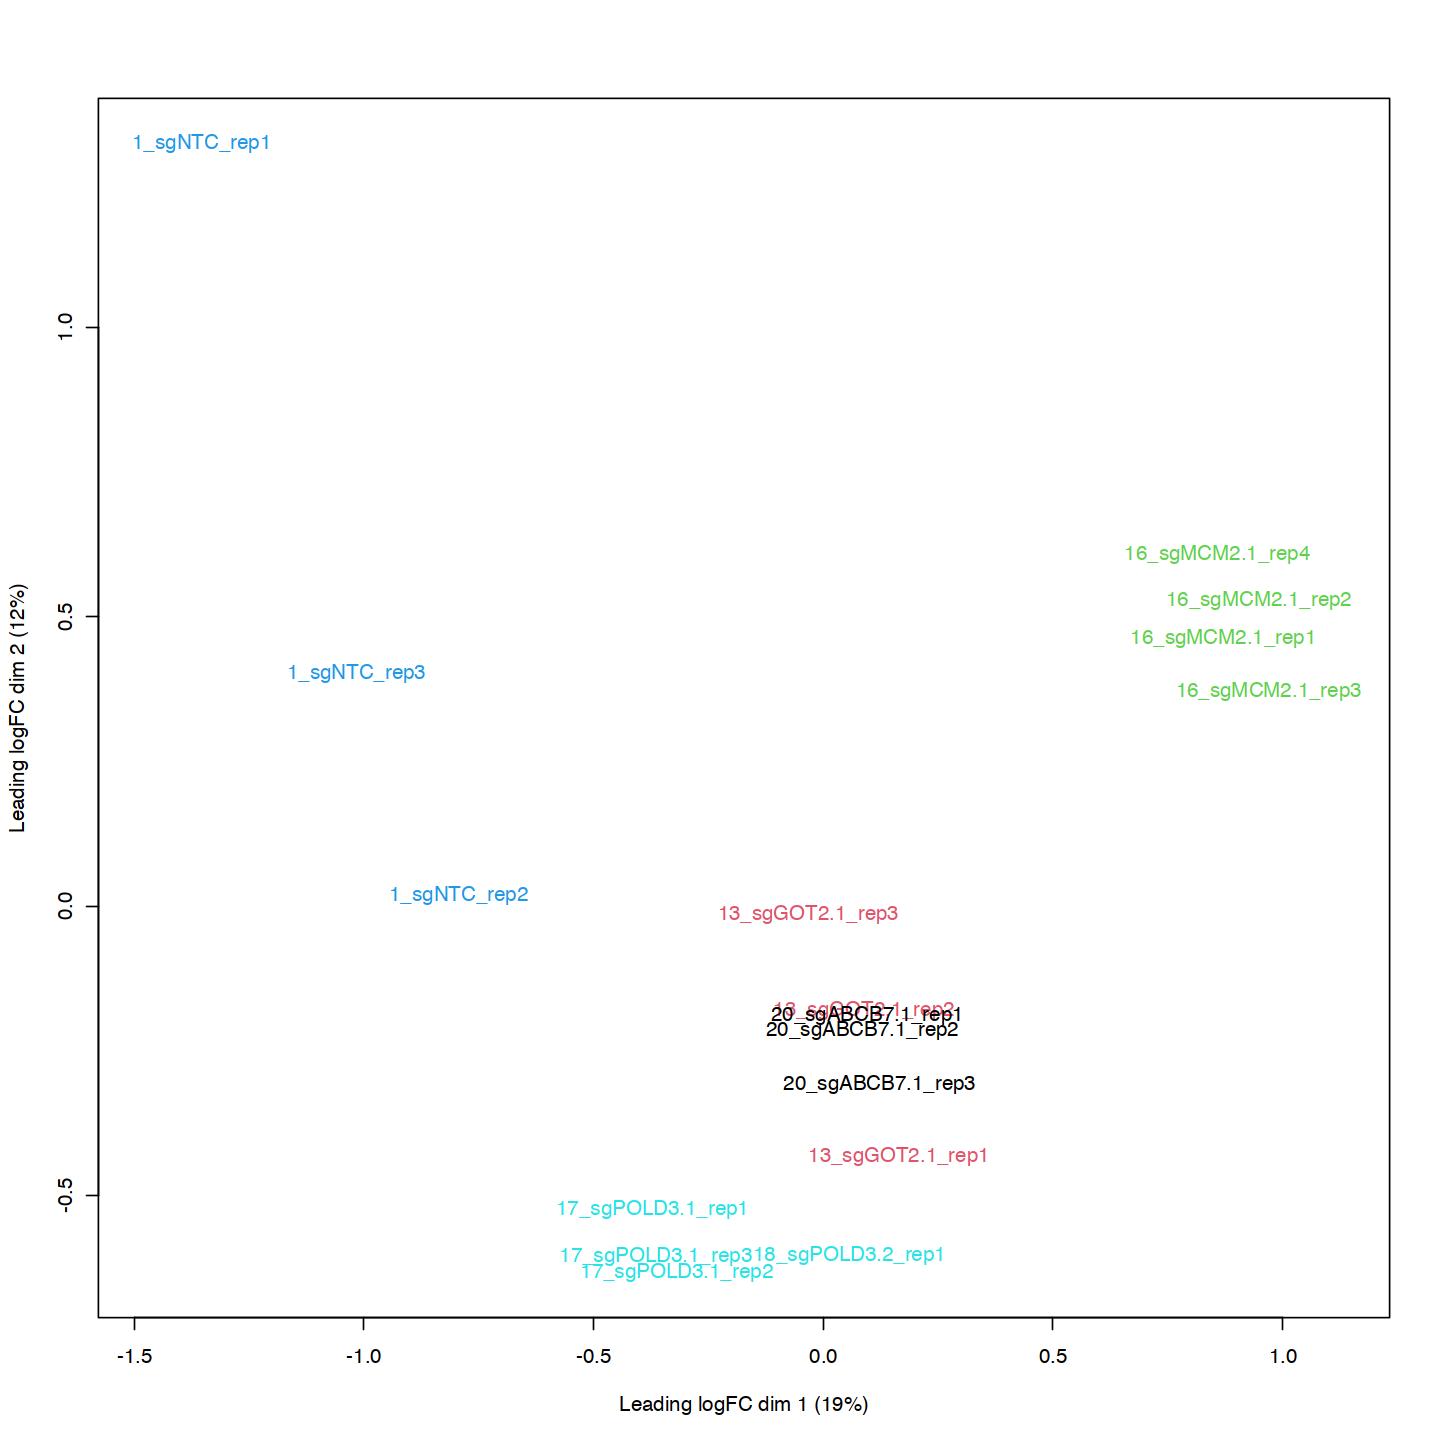

In [27]:
options(repr.plot.width=12, repr.plot.height=12)
plotMDS(d, col = as.numeric(as.factor(conds)))

In [28]:
length(conds)

[1] 17

,condssgABCB7_1,condssgGOT2_1,condssgMCM2_1,condssgNTC,condssgPOLD3
AP006222.2,3.388904,3.407470,3.115862,2.944677,2.750495
RP5-857K21.4,4.720051,4.767569,5.199725,4.040452,4.313354
MTND1P23,8.161940,7.960813,8.558449,7.925615,8.178982
MTND2P28,7.122353,6.983183,7.731583,6.610376,6.859984
hsa-mir-6723,12.200665,12.872066,12.877406,12.149462,12.306833
RP5-857K21.7,12.226746,12.379473,12.632761,12.238888,12.094030


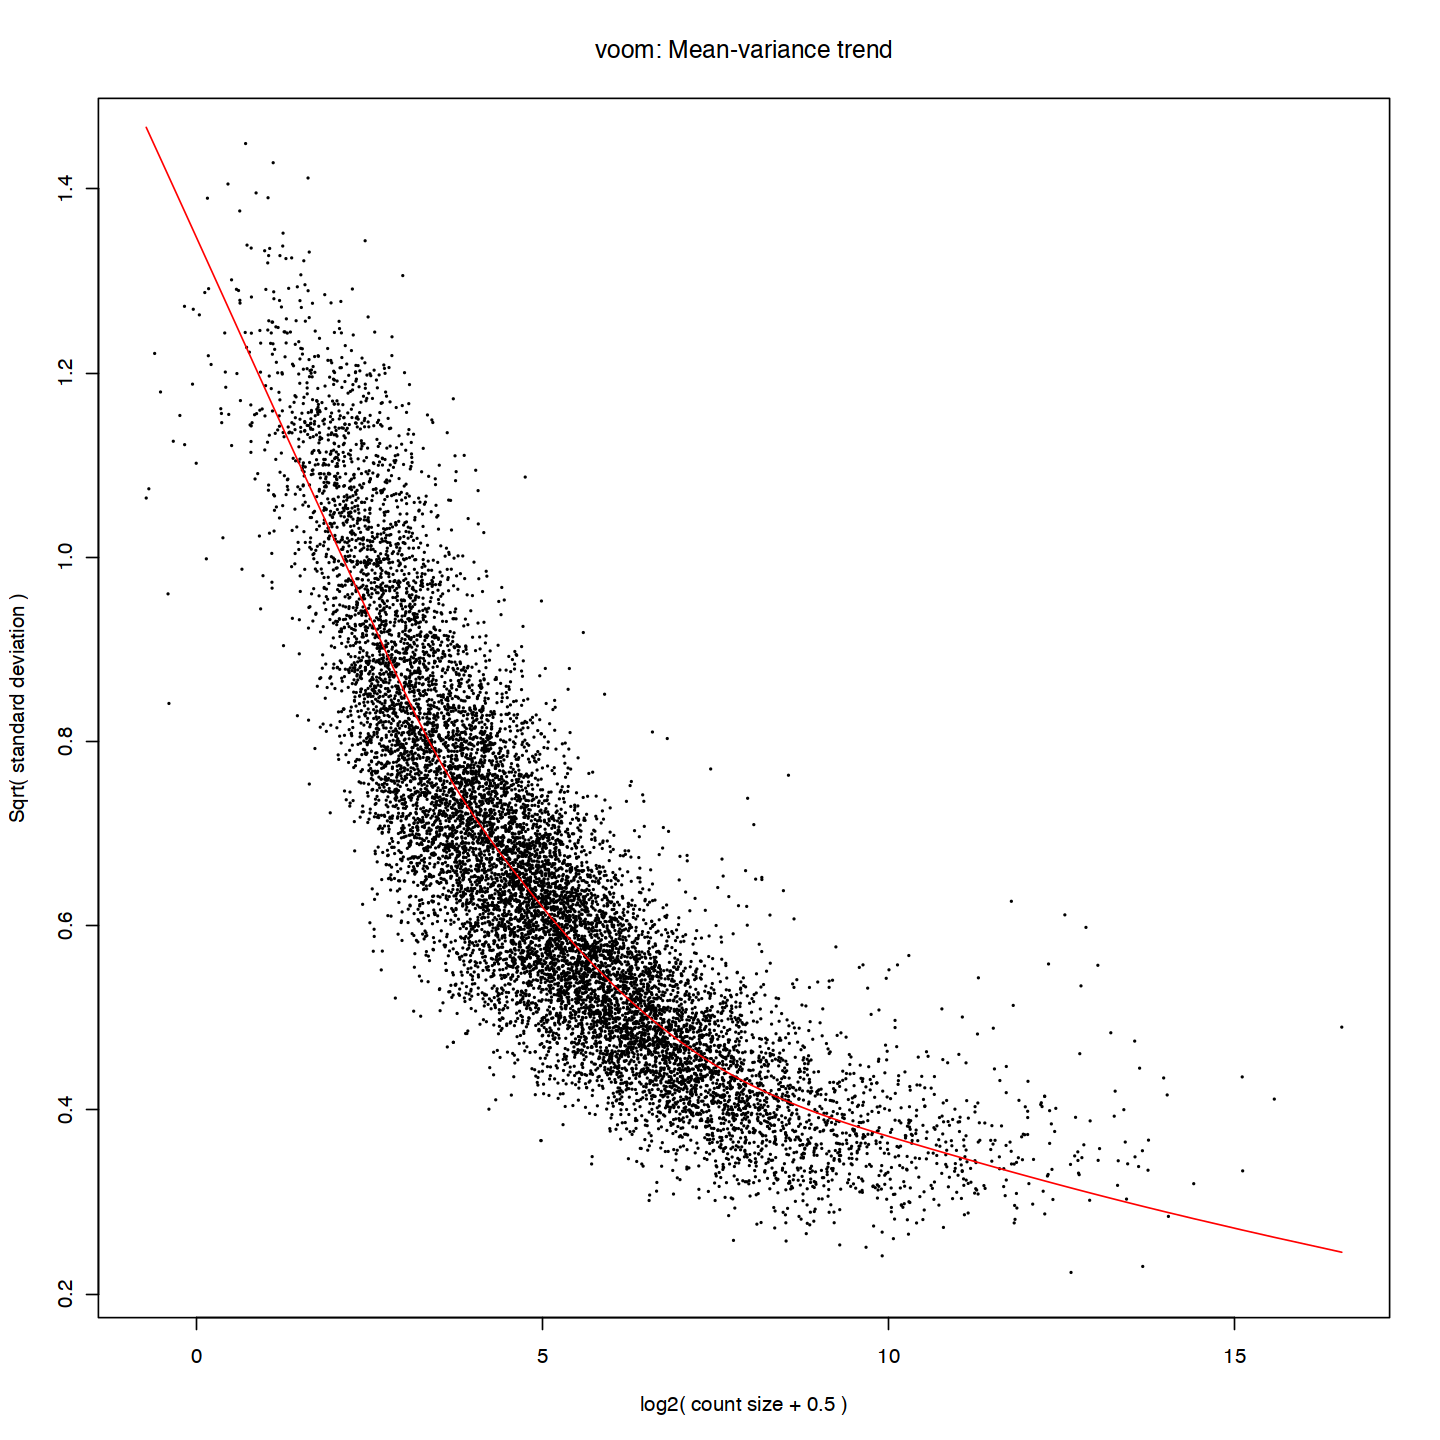

In [29]:
mm <- model.matrix(~0 + conds)
y <- voom(d, mm, plot = T)
fit <- lmFit(y, mm)
head(coef(fit))


In [30]:
norm_data = y$E
#write.csv(norm_data, "220215_BD245_THP1_norm_expr.csv", quote=F)

In [31]:
process_res = function(res, fit) {
    tmp <- contrasts.fit(fit, res)
    tmp <- eBayes(tmp)
    res <- topTable(tmp, sort.by = "P", n = Inf)
    
    res["gene"] = rownames(res)
    res["nlogpval"] = -log10(res$adj.P.Val)
    res["label"] = ""
    res_up = res[res$logFC > 0,]
    res_up[order(-res_up$t),][1:100,]$label = res_up[order(-res_up$t),][1:100,]$gene
    res_down = res[res$logFC < 0,]
    res_down[order(res_down$t),][1:100,]$label = res_down[order(res_down$t),][1:100,]$gene
    res = rbind(res_up, res_down)
    res = res[order(-res$t),]
    return(res)
}

In [32]:
abcb7 <- process_res(makeContrasts(condssgABCB7_1 - condssgNTC, levels = colnames(coef(fit))), fit)
got2 <- process_res(makeContrasts(condssgGOT2_1 - condssgNTC, levels = colnames(coef(fit))), fit)
mcm2 <- process_res(makeContrasts(condssgMCM2_1 - condssgNTC, levels = colnames(coef(fit))), fit)
pold3 <- process_res(makeContrasts(condssgPOLD3 - condssgNTC, levels = colnames(coef(fit))), fit)

In [33]:
abcb7["ABCB7",]
got2["GOT2",]
mcm2["MCM2",]
pold3["POLD3",]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
ABCB7,-4.011241,4.149049,-7.538563,1.050923e-08,8.105854e-07,6.85584,ABCB7,6.091201,


,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
GOT2,-1.809314,5.312218,-6.357325,3.205257e-07,1.273184e-05,6.383736,GOT2,4.895109,


,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
MCM2,-5.23216,3.46708,-7.695079,6.751139e-09,2.374657e-07,7.25924,MCM2,6.624399,


,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
POLD3,-2.909042,4.931213,-11.14839,8.449173e-13,3.092661e-10,17.26193,POLD3,9.509668,POLD3


Warning message:
"ggrepel: 61 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


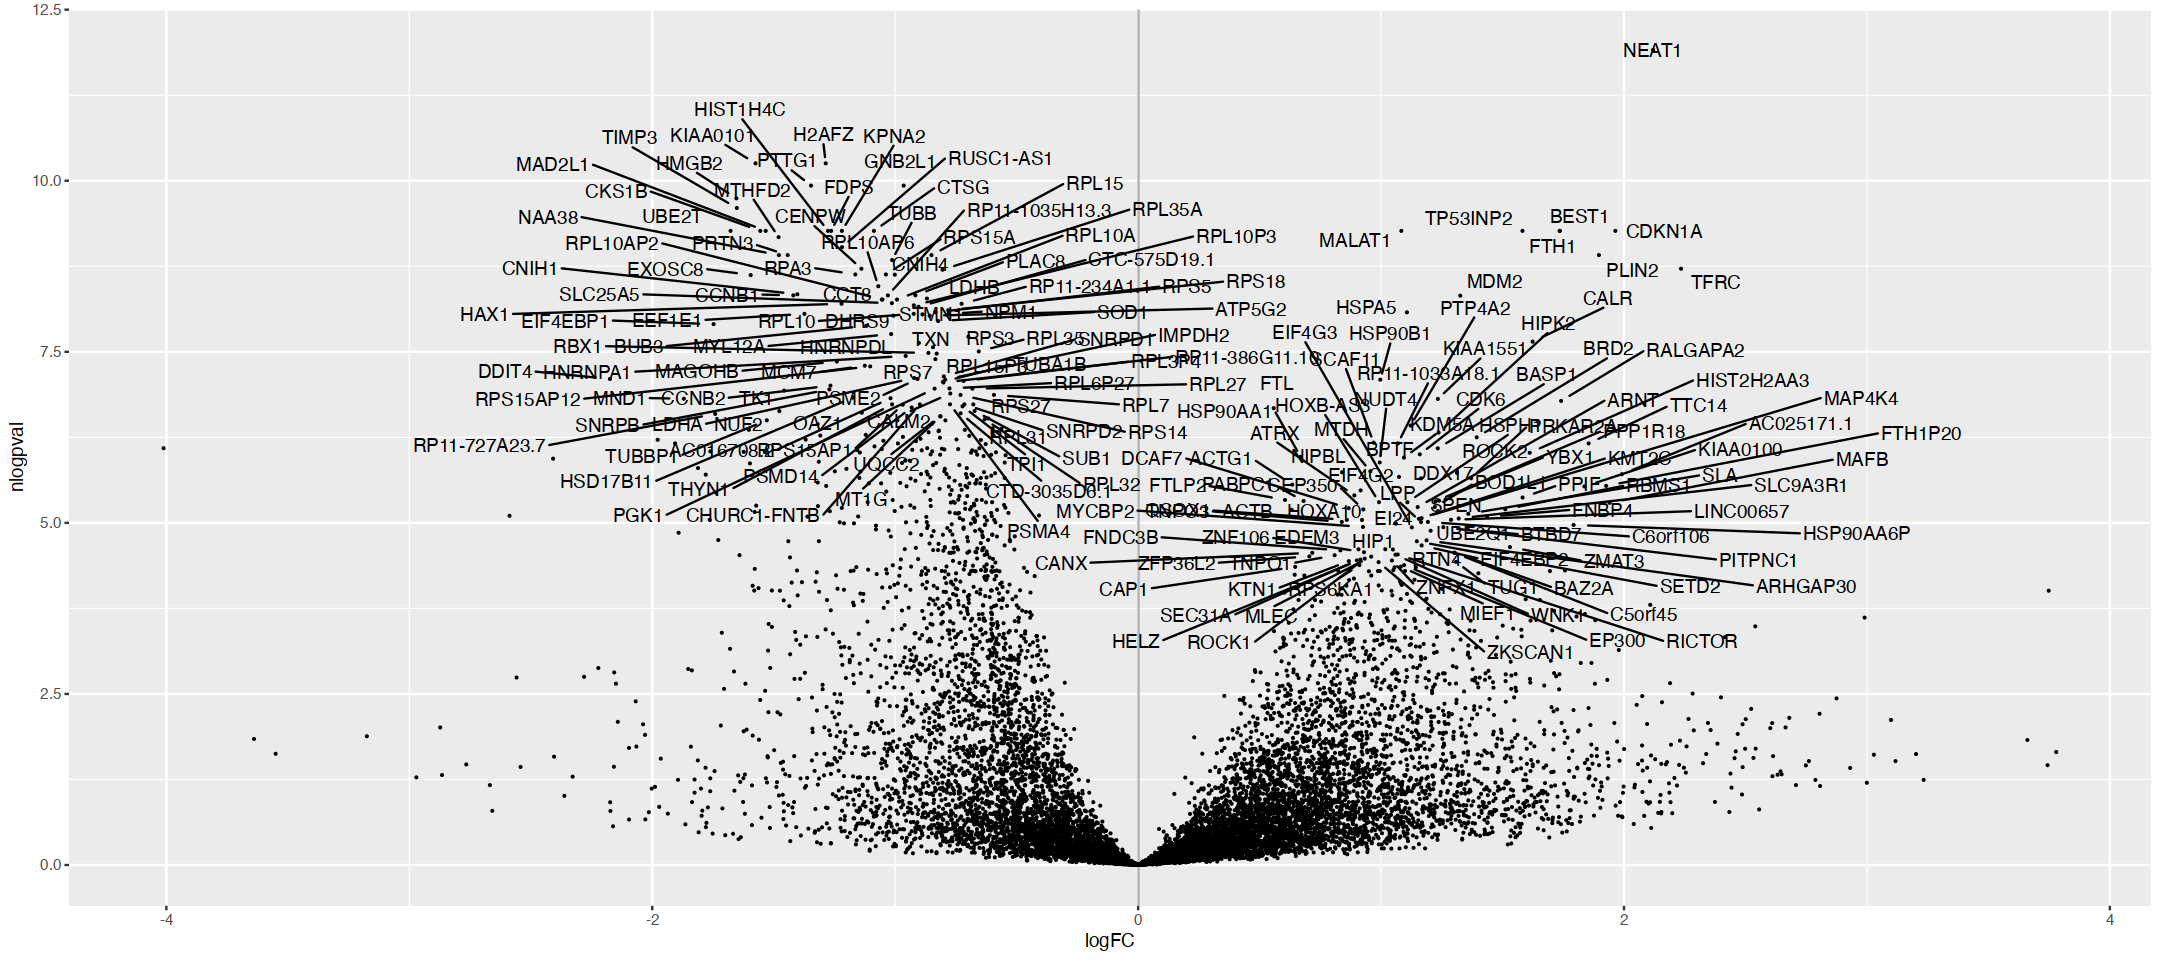

In [34]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(abcb7, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 164 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


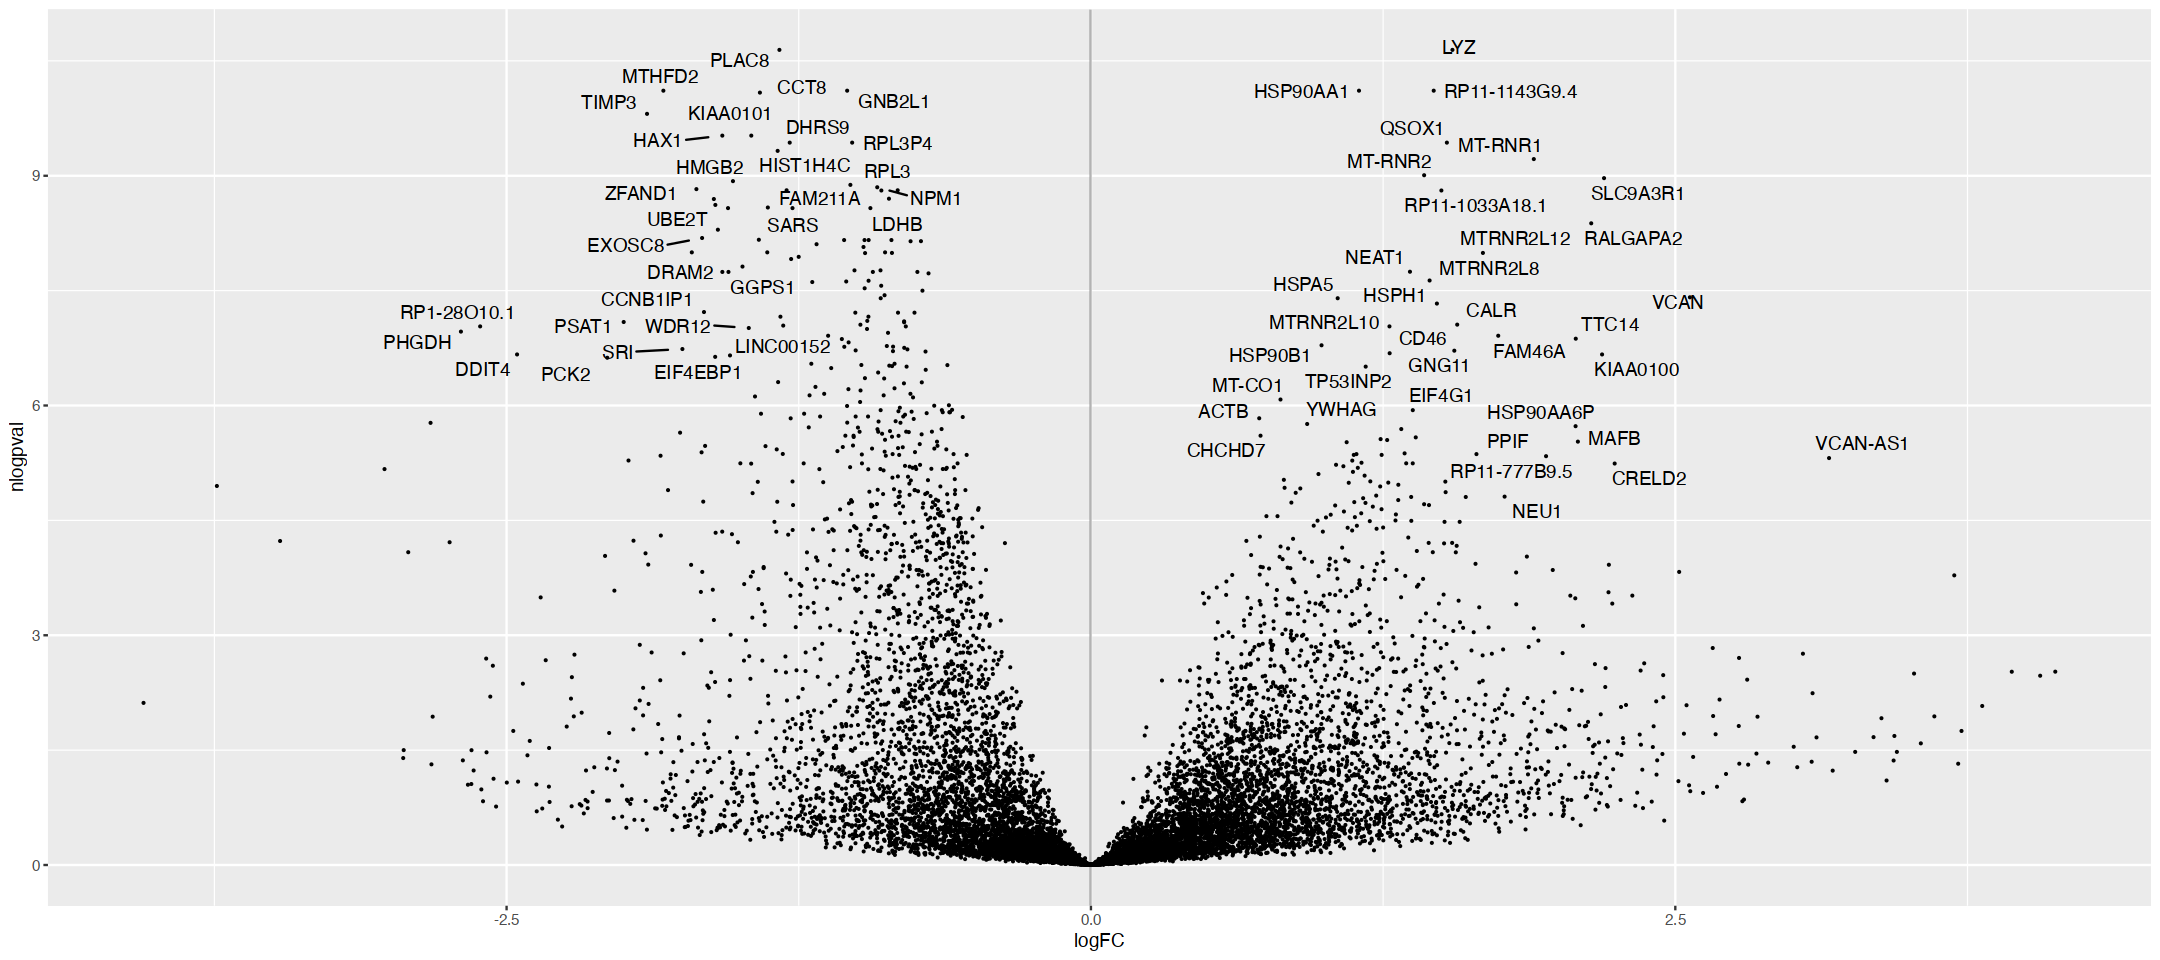

In [35]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(got2, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 162 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


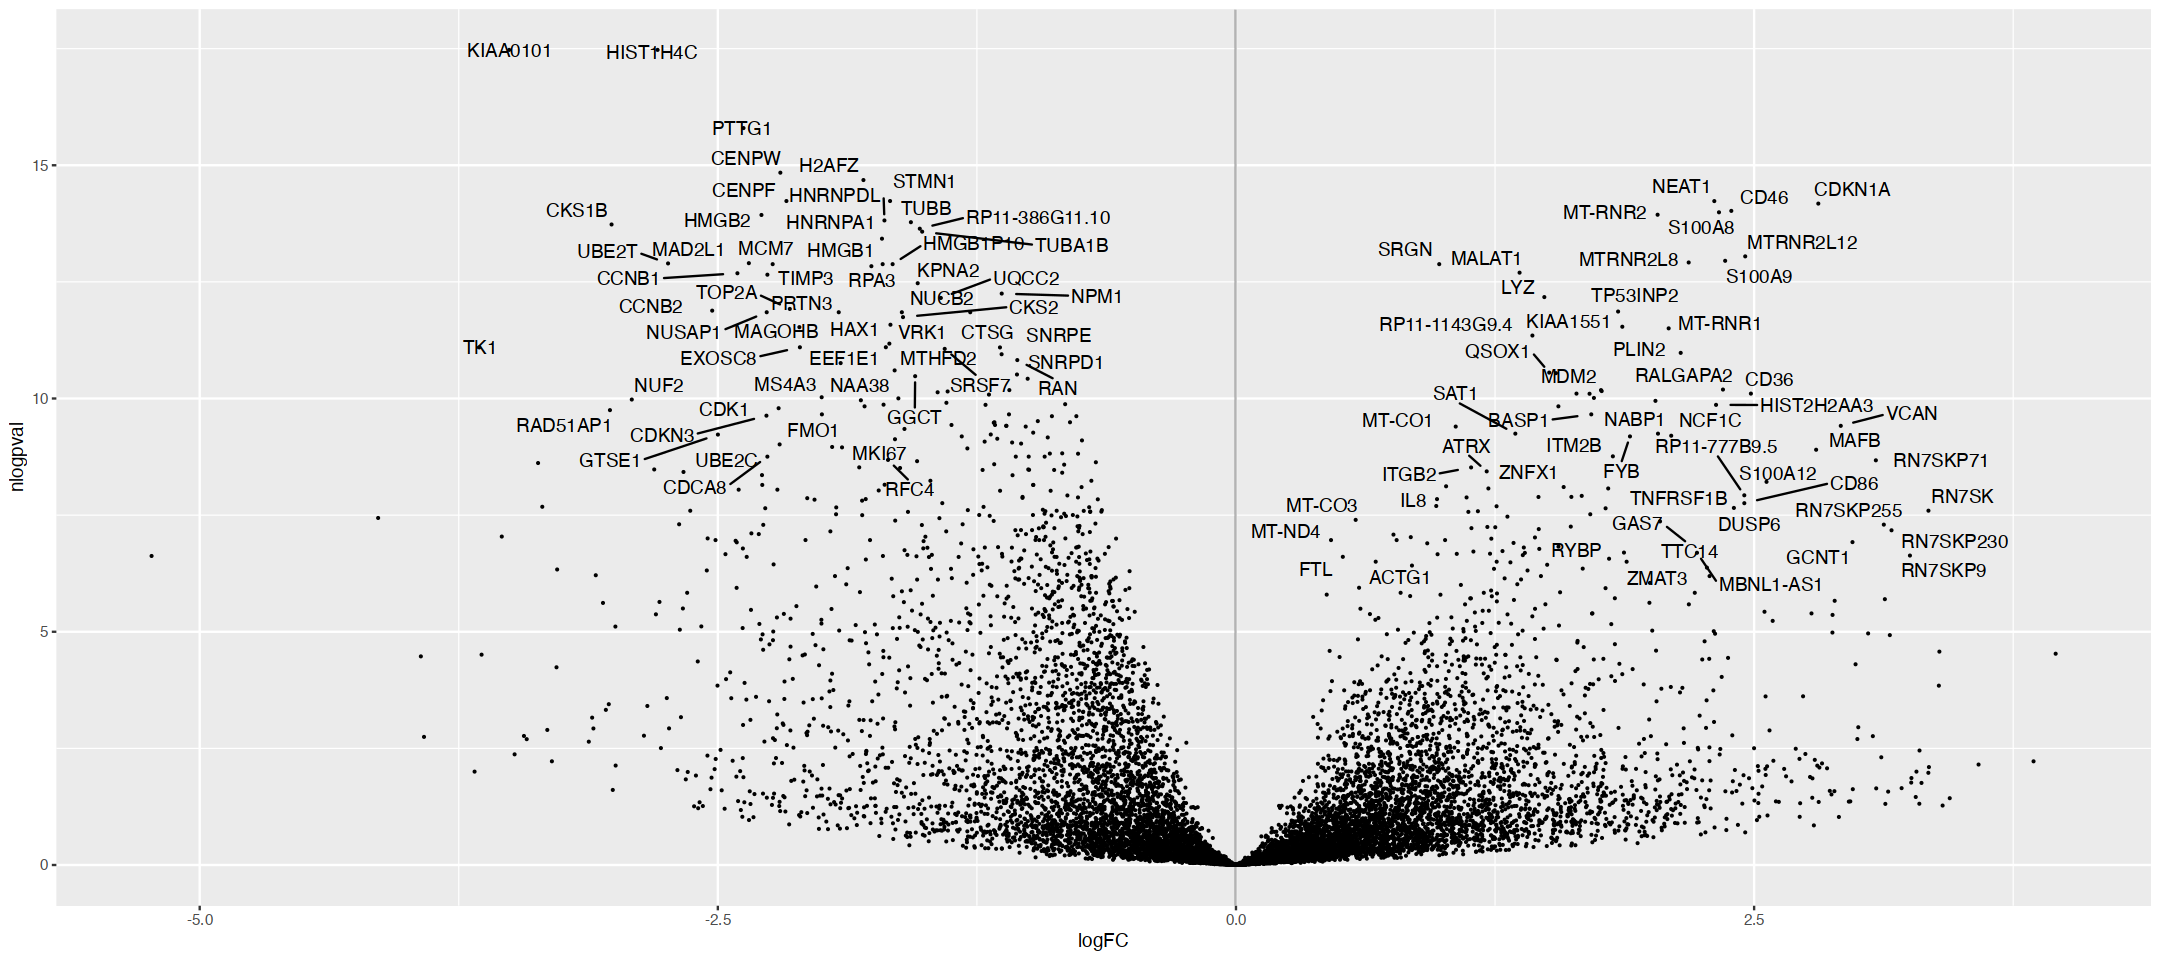

In [36]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(mcm2, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 194 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


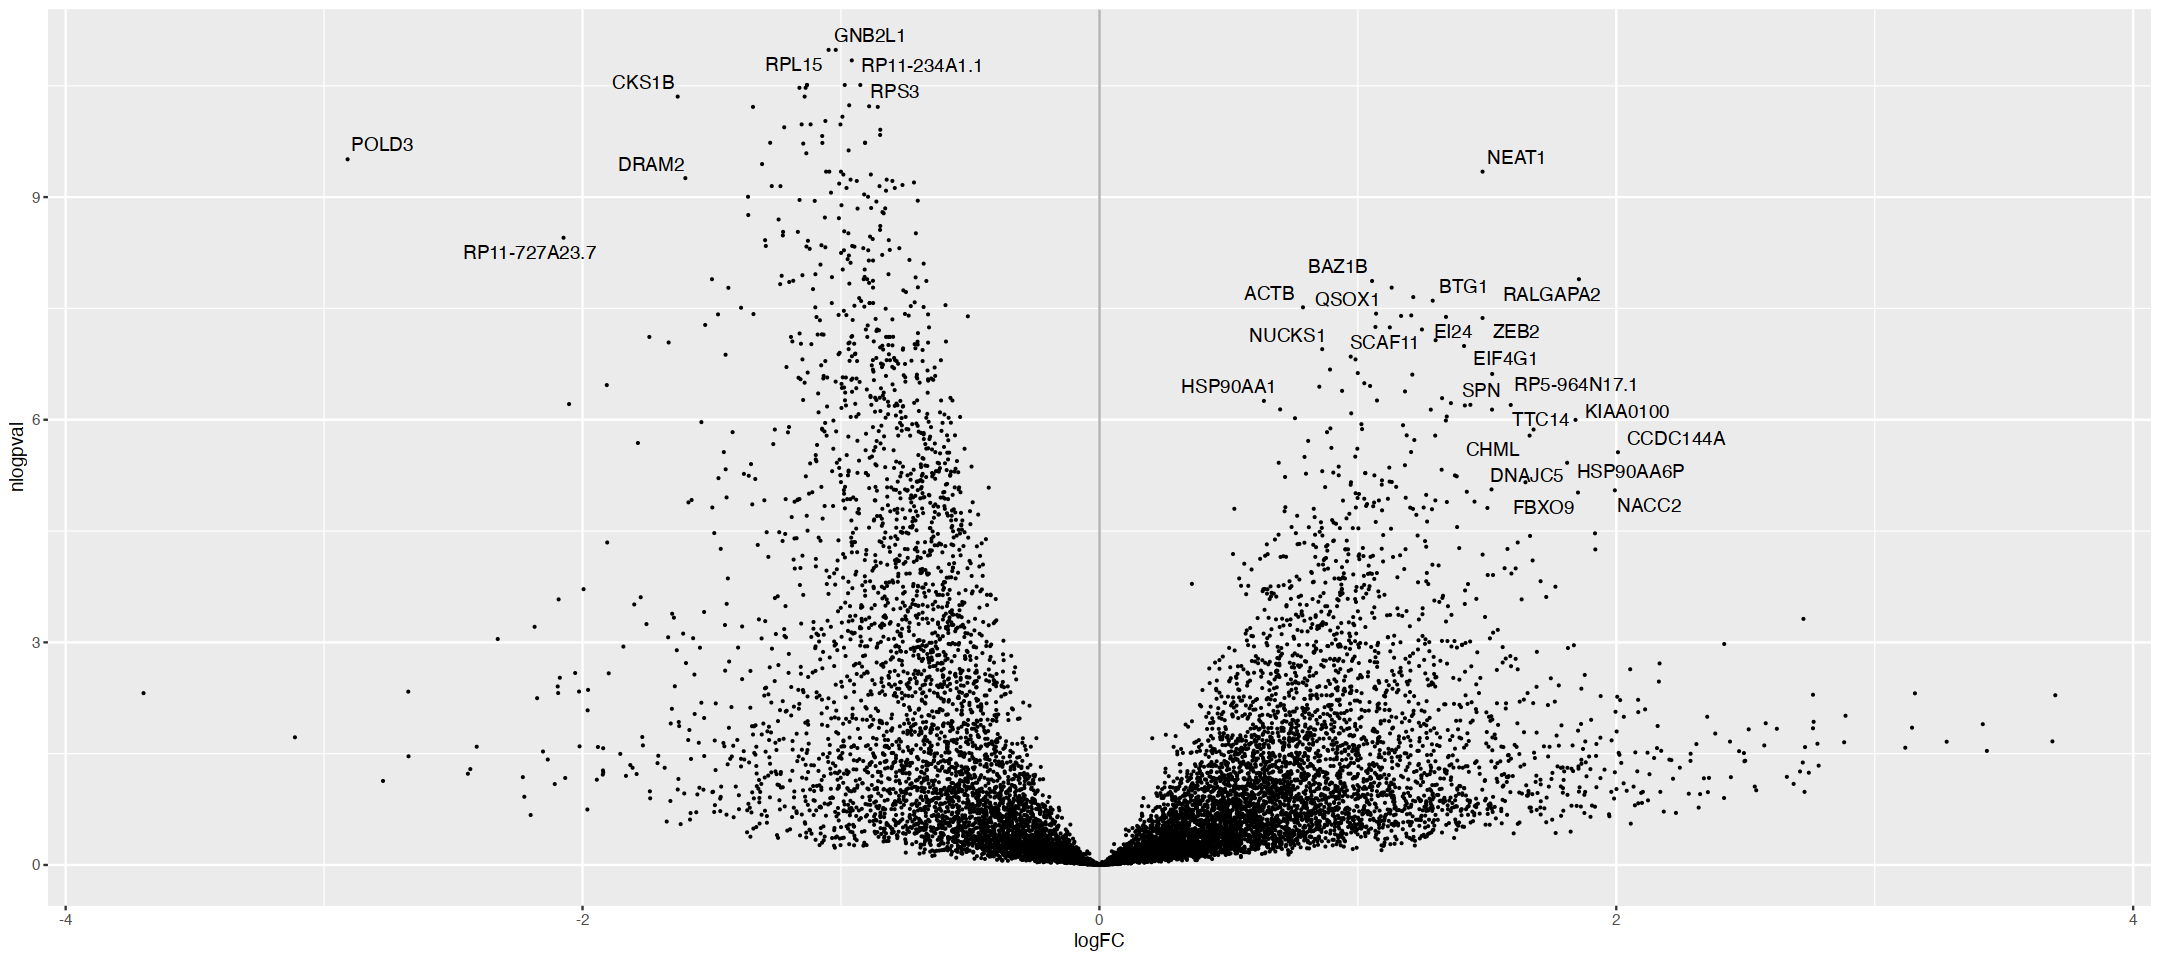

In [37]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(pold3, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1) +
geom_vline(xintercept=0, alpha=0.3)

In [38]:
interesting_genes = c("SLC7A11", "MTHFD2", "CTH", "CHAC1", "ATF4", "CDKN1A", "CCNE2",
                      "IL1B", "IL8", "CXCL10", "EGR1", "NPM1", "FLT3", "HOXA9", "ZFP36L2", "ITGAM", "LYZ", "LYN",
                      "CD36", "CXCR2", "IL7R", "LPXN", "MAFB", "CD86",
                      "SLC15A3", "CD163", "SPI1", "PLIN2", "AIM2", "MS4A3", "CTSG", "MYB", "SOX4", "IRF8",
                      "POLD3", "GOT2", "ABCB7", "MCM2")

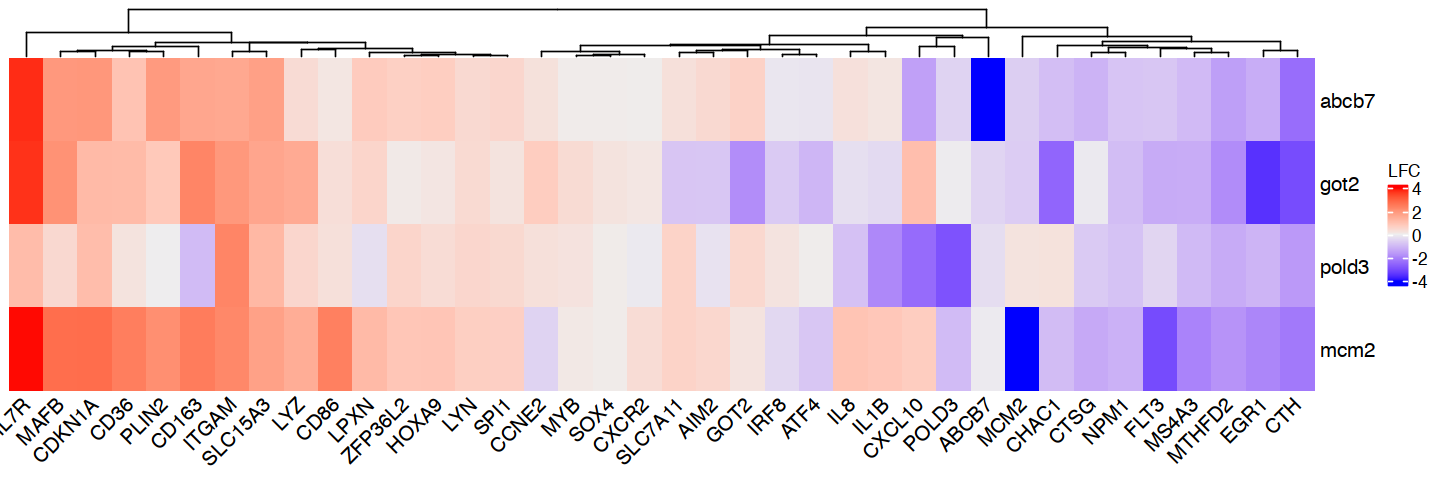

In [39]:
genes = cbind(abcb7[interesting_genes, "logFC"], got2[interesting_genes, "logFC"], 
                         pold3[interesting_genes, "logFC"],
                         mcm2[interesting_genes, "logFC"])
rownames(genes) = interesting_genes
colnames(genes) = c("abcb7", "got2", "pold3", "mcm2")

options(repr.plot.width=12, repr.plot.height=4)
Heatmap(t(genes), cluster_rows=F, width=4, name="LFC", column_names_rot=45)

pdf 
  2

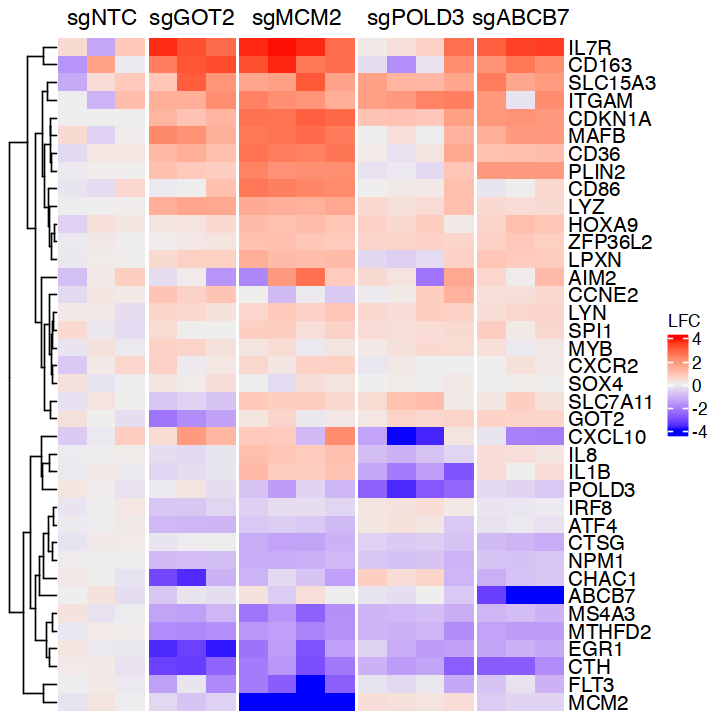

In [40]:
options(repr.plot.width = 6, repr.plot.height = 6)

conds_plot <- c(rep("sgNTC", 3), rep("sgGOT2", 3), rep("sgMCM2", 4),
rep("sgPOLD3", 4), rep("sgABCB7", 3))

h = Heatmap(norm_data[interesting_genes, ] -
apply(norm_data[interesting_genes, 1 : 3], 1, mean),
cluster_columns = F,
column_split = factor(conds_plot, levels = unique(conds_plot)),
name = "LFC", column_names_rot = 45, row_title_rot = 0, show_column_names = F,
column_names_side = "top", column_dend_side = "bottom")
draw(h)

pdf("../output/220215_bd245_thp1kd_heatmap.pdf", width=6, height=6)
draw(h)
dev.off()


In [42]:
pma_lfc = read.table("../data/220215_thp1_pma48h.txt")
head(pma_lfc)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
MMP1,8.328886,8.901153,55.41606,6.851306e-33,8.290765e-29,64.04463,MMP1,28.08141
GDF15,5.912616,7.702109,44.61906,5.683393e-30,3.438737e-26,57.81710,GDF15,25.46360
RGS16,7.295067,6.104724,41.47028,5.449849e-29,2.198288e-25,55.10885,RGS16,24.65792
SERPINE2,6.849133,5.917209,37.18876,1.561340e-27,4.723443e-24,52.23158,SERPINE2,23.32574
RGS2,6.634181,8.021227,35.47432,6.646093e-27,1.608487e-23,51.27793,RGS2,22.79358
ACPP,7.097969,5.250125,34.91712,1.079625e-26,2.177424e-23,49.98346,ACPP,22.66206


In [43]:
pma_lfc_top = rownames(subset(pma_lfc, (logFC > 2) & (adj.P.Val < 0.01)))
pma_lfc_bottom = rownames(subset(pma_lfc, (logFC < -2) & (adj.P.Val < 0.01)))

length(pma_lfc_top)

[1] 1192

In [44]:
library(fgsea)
data(examplePathways)


In [45]:
pathways = list()
pathways[[1]] = pma_lfc_top
pathways[[2]] = pma_lfc_bottom
names(pathways) = c("top", "bottom")

In [46]:
mcm2_lfc = mcm2$logFC
names(mcm2_lfc) = rownames(mcm2)

pdf("../output/220215_sgmcm2_gsea.pdf", width=3, height=1.6)
plotEnrichment(pathways[["top"]],
               mcm2_lfc) + labs(title="sgMCM2") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"),
                     panel.grid = element_blank())
dev.off()

pdf 
  2

In [47]:
pold3_lfc = pold3$logFC
names(pold3_lfc) = rownames(pold3)
pdf("../output/220215_sgpold3_gsea.pdf", width=3, height=1.6)
plotEnrichment(pathways[["top"]],
               pold3_lfc) + labs(title="sgPOLD3") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"),
                     panel.grid = element_blank())
dev.off()

pdf 
  2

In [48]:
abcb7_lfc = abcb7$logFC
names(abcb7_lfc) = rownames(abcb7)
pdf("../output/220215_sgabcb7_gsea.pdf", width=3, height=1.6)

plotEnrichment(pathways[["top"]],
               abcb7_lfc) + labs(title="sgABCB7") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"),
                     panel.grid = element_blank())

dev.off()

pdf 
  2

In [49]:
got2_lfc = got2$logFC
names(got2_lfc) = rownames(got2)
pdf("../output/220215_sggot2_gsea.pdf", width=3, height=1.6)

plotEnrichment(pathways[["top"]],
               got2_lfc) + labs(title="sgGOT2") + ylab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"),
                     panel.grid = element_blank())

dev.off()

pdf 
  2

In [50]:
fgseaSimple(pathways, pold3_lfc, nperm=1000)[1,1:7]
fgseaSimple(pathways, got2_lfc, nperm=1000)[1,1:7]
fgseaSimple(pathways, mcm2_lfc, nperm=1000)[1,1:7]
fgseaSimple(pathways, abcb7_lfc, nperm=1000)[1,1:7]

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
top,0.001046025,0.00209205,0.312143,1.591706,0,605


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
top,0.00110011,0.00220022,0.4879968,2.41406,0,605


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.04% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
top,0.00127551,0.00255102,0.6349911,3.229884,0,605


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.03% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
top,0.001020408,0.002040816,0.5525752,2.706331,0,605
